In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv("dataset/datatraining.txt", delimiter=',')

In [3]:
dataset_train

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.500000,0.004757,1
6,2015-02-04 17:55:59,23.100000,27.200000,419.0,701.000000,0.004757,1
7,2015-02-04 17:57:00,23.100000,27.200000,419.0,701.666667,0.004757,1
8,2015-02-04 17:57:59,23.100000,27.200000,419.0,699.000000,0.004757,1
9,2015-02-04 17:58:59,23.100000,27.200000,419.0,689.333333,0.004757,1
10,2015-02-04 18:00:00,23.075000,27.175000,419.0,688.000000,0.004745,1


In [4]:
rows = 8143
training_set = dataset_train.iloc[:, 4:5].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []

for i in range(60, rows):
    X_train.append(training_set[i-60:i, 0])
    y_train.append(training_set[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)    

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
X_train

array([[[0.190933  ],
        [0.18644592],
        [0.18613647],
        ...,
        [0.13115684],
        [0.12950642],
        [0.12888751]],

       [[0.18644592],
        [0.18613647],
        [0.1828872 ],
        ...,
        [0.12950642],
        [0.12888751],
        [0.13229151]],

       [[0.18613647],
        [0.1828872 ],
        [0.1805663 ],
        ...,
        [0.12888751],
        [0.13229151],
        [0.12950642]],

       ...,

       [[0.02583939],
        [0.02594254],
        [0.02367322],
        ...,
        [0.22744855],
        [0.23178091],
        [0.23317345]],

       [[0.02594254],
        [0.02367322],
        [0.02367322],
        ...,
        [0.23178091],
        [0.23317345],
        [0.23874362]],

       [[0.02367322],
        [0.02367322],
        [0.02614885],
        ...,
        [0.23317345],
        [0.23874362],
        [0.25225643]]])

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [10]:
regressor = Sequential()

regressor.add(LSTM(70, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(120, return_sequences=True))
regressor.add(Dropout(0.15))

regressor.add(LSTM(120, return_sequences=False))
regressor.add(Dropout(0.15))

regressor.add(Dense(1))

regressor.compile('adam', loss='mean_squared_error')

In [11]:
regressor.fit(X_train, y_train, batch_size=46, epochs=10)

Epoch 1/10
8083/8083 [==============================] - 40s 5ms/step - loss: 0.0018
Epoch 2/10
8083/8083 [==============================] - 39s 5ms/step - loss: 4.5480e-04
Epoch 3/10
8083/8083 [==============================] - 39s 5ms/step - loss: 3.8249e-04
Epoch 4/10
8083/8083 [==============================] - 39s 5ms/step - loss: 3.8381e-04
Epoch 5/10
8083/8083 [==============================] - 39s 5ms/step - loss: 4.0994e-04
Epoch 6/10
8083/8083 [==============================] - 39s 5ms/step - loss: 3.4134e-04
Epoch 7/10
8083/8083 [==============================] - 39s 5ms/step - loss: 3.3587e-04
Epoch 8/10
8083/8083 [==============================] - 40s 5ms/step - loss: 3.2121e-04
Epoch 9/10
8083/8083 [==============================] - 40s 5ms/step - loss: 3.3807e-04
Epoch 10/10
8083/8083 [==============================] - 40s 5ms/step - loss: 3.4434e-04


In [15]:
dataset_test = pd.read_csv("dataset/datatest.txt")
real = dataset_test.iloc[:, 4].values

In [16]:
dataset_total = pd.concat((dataset['CO2'], dataset_test['CO2']), axis=0)

In [18]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [19]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, :])
    
X_test = np.array(X_test)   
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

prediction = regressor.predict(X_test)
prediction = sc.inverse_transform(prediction)

In [32]:
prediction

array([[788.77563],
       [791.2362 ],
       [789.1242 ],
       [784.6375 ],
       [779.61725],
       [775.25134],
       [772.6243 ],
       [772.1736 ],
       [773.3083 ],
       [775.7327 ],
       [779.2132 ],
       [783.5701 ],
       [788.8052 ],
       [794.861  ],
       [801.9866 ],
       [809.94635],
       [818.49536],
       [828.11536],
       [838.72565],
       [849.76154]], dtype=float32)

In [36]:
real

array([[749.2       ],
       [760.4       ],
       [769.66666667],
       [774.75      ],
       [779.        ],
       [790.        ],
       [798.        ],
       [797.        ],
       [803.2       ],
       [809.        ],
       [815.25      ],
       [824.        ],
       [832.        ],
       [845.33333333],
       [852.4       ],
       [861.        ],
       [880.        ],
       [891.        ],
       [897.6       ],
       [900.5       ]])

In [29]:
real = real[:20]

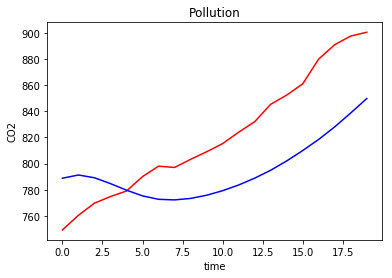

In [37]:
plt.plot(real, color='red')
plt.plot(prediction, color='blue')
plt.title("Pollution")
plt.ylabel("CO2")
plt.xlabel("time")
plt.show()